## 線性方程式：Y = ax + b
y = 股價, a = 斜率, x = 天數, b = 截距  
使用：最小二乘法（Least Squares Method）

## 利用yfinance進行測試

[*********************100%***********************]  1 of 1 completed
<ipython-input-1-62ab17de2ea0>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = float(m)
<ipython-input-1-62ab17de2ea0>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b = float(b)
<ipython-input-1-62ab17de2ea0>:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(days[i], price, f'{float(price):.2f}', fontsize=8, ha='center', va='bottom')


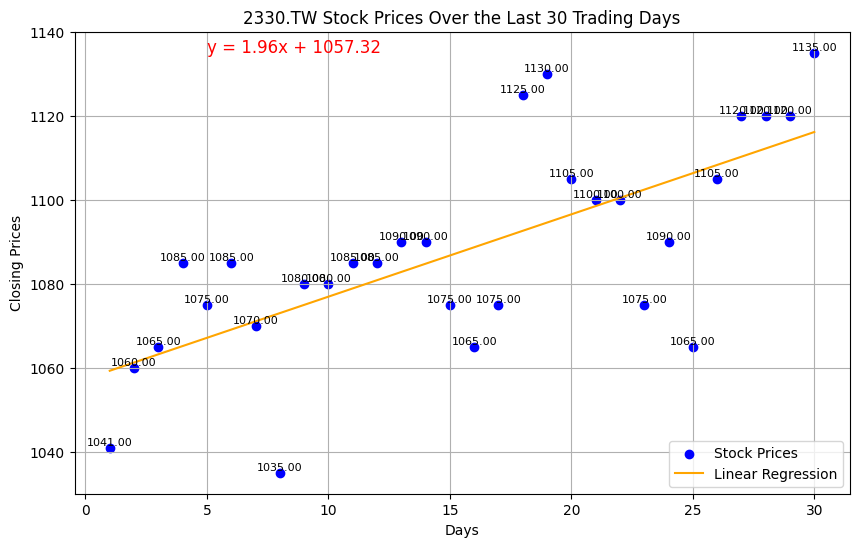

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# 設定股票代號
ticker_symbol = '2330.TW'

# 抓取最近3個月的股價資料（'3mo' 為有效參數）
data = yf.download(ticker_symbol, period="3mo")

# 檢查是否成功抓取資料
if data.empty:
    raise Exception("未能抓取到資料，請確認 ticker 是否正確或網路連線狀態。")

# 取得最後30個交易日的收盤價
closing_prices = data['Close'].tail(30).values

# 設置 X 軸日期索引 (1 到 30)
days = np.arange(1, len(closing_prices) + 1)

# 使用 np.polyfit 計算線性回歸的斜率 m 和截距 b
m, b = np.polyfit(days, closing_prices, 1)

# 將 m 與 b 轉成 float（標量），以避免格式化字串時產生錯誤
m = float(m)
b = float(b)

# 畫出股價散點圖
plt.figure(figsize=(10, 6))
plt.scatter(days, closing_prices, label='Stock Prices', color='blue')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.title(f'{ticker_symbol} Stock Prices Over the Last {len(closing_prices)} Trading Days')

# 在每個點上標示股價
for i, price in enumerate(closing_prices):
    # 確保 price 為 float 型別
    plt.text(days[i], price, f'{float(price):.2f}', fontsize=8, ha='center', va='bottom')

# 畫出線性回歸線
plt.plot(days, m * days + b, label='Linear Regression', color='orange')

# 在圖上顯示線性方程式，並將 m 與 b 格式化為 float
plt.text(5, max(closing_prices), f'y = {m:.2f}x + {b:.2f}', fontsize=12, color='red')

plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [2]:
# 預測下一個交易日的股價
next_day = len(closing_prices) + 1
predicted_price = float(m * next_day + b)

print(f"預測第 {next_day} 天的股價: {predicted_price:.2f}")

預測第 31 天的股價: 1118.08
